In [624]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import wave
from wave import open as open_wave
# from glob2 import *

In [625]:
from glob import *
import parselmouth
import soundfile as sf
import pyloudnorm as pyln
import pitch
import librosa
import statsmodels.api as sm
from scipy.signal import find_peaks
import itertools

def wav_to_df(emotion):
    count = 0
    emotion_code = 0
    files = []
    durations = []
    frame_data = []
    emotions = []
    pitches = []
    frequencies = []
    mfcc_lists = []
    zcrs = []
    chroma = []
    # intensity = []
    loudness_list = []
    mel_spectograms = []

    for wavfile in glob(emotion + '/*wav'):
        # print(str(count) + wavfile)
        count += 1
        sound = parselmouth.Sound(wavfile)
        # intensity.append(sound.to_intensity())
        try:
            w = wave.open(wavfile, 'r')
            d = w.readframes(w.getnframes())
        except:
            d = ''

        data, rate = sf.read(wavfile)
        meter = pyln.Meter(rate)
        loudness = meter.integrated_loudness(data)

        signal, sample_rate = librosa.load(wavfile)
        #sampling period
        T = 1/sample_rate
        #signal length in samples
        N = len(data)
        #signal length in seconds
        t = N /sample_rate
        Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
        Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
        Pxx = np.abs(Y_k) # Power spectrum
        f = sample_rate * np.arange((N/2)) / N
        auto = sm.tsa.acf(data, nlags = 2000)
        mfccs = librosa.feature.mfcc(y = signal, sr = sample_rate, n_mfcc = 12)
        chromagram = librosa.feature.chroma_stft(y = signal, sr = sample_rate)
        mel_spectogram = librosa.feature.melspectrogram(y = signal, sr = sample_rate, n_mels = 12)
        zcr = librosa.feature.zero_crossing_rate(y = signal)

        if (emotion == 'angry'):
            emotion_code = 1
        elif (emotion == 'happy'):
            emotion_code = 2
        elif (emotion == 'sad'):
            emotion_code = 3
        else:
            emotion_code = 4


        #compute pitch
        peaks = find_peaks(auto)[0]
        lag = peaks[0]
        pitch = sample_rate / lag
        
        # mel_spectogram = list(itertools.chain.from_iterable(mel_spectogram))
        mel_spectograms.append(mel_spectogram)
        # mfcc_list.append(mfccs)
        zcrs.append((zcr[0]).tolist())
        # mfccs = list(itertools.chain.from_iterable(mfccs))
        # chromagram = list(itertools.chain.from_iterable(chromagram))
        chroma.append(chromagram)
        mfcc_lists.append(mfccs)
        loudness_list.append(loudness)
        frame_data.append(d)
        files.append(wavfile)
        emotions.append(emotion_code)
        pitches.append(pitch)
        frequencies.append(f)

        w.close()
    emotion_dict = {'file': files, 'data': frame_data, 'emotion': emotions, 'loudness': loudness_list, 'pitch': pitches, 'mfccs' : mfcc_lists, 'zcr': zcrs, 'chroma': chroma, 'mel spectogram': mel_spectograms}
    return pd.DataFrame(emotion_dict)

# angry_data

In [626]:
angry_df = wav_to_df('angry')
angry_df.info()
angry_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file            100 non-null    object 
 1   data            100 non-null    object 
 2   emotion         100 non-null    int64  
 3   loudness        100 non-null    float64
 4   pitch           100 non-null    float64
 5   mfccs           100 non-null    object 
 6   zcr             100 non-null    object 
 7   chroma          100 non-null    object 
 8   mel spectogram  100 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ KB


,file,data,emotion,loudness,pitch,mfccs,zcr,chroma,mel spectogram
0,angry/YAF_numb_angry.wav,b'\x05\x00\x15\x00\x12\x00\xef\xff\xef\xff\x00...,1,-19.107531,3675.000,"[[-467.627, -361.8926, -325.92917, -322.34055,...","[0.228515625, 0.392578125, 0.58203125, 0.68701...","[[0.7681701, 0.50318307, 0.548958, 0.7878838, ...","[[4.572029e-05, 0.00015740524, 0.00020482684, ..."
1,angry/YAF_seize_angry.wav,b'\x04\x00\xf1\xff\xed\xff\xcc\xff\xd8\xff\xdd...,1,-25.088015,3675.000,"[[-484.4726, -427.65967, -402.07568, -379.6679...","[0.30322265625, 0.5, 0.705078125, 0.7846679687...","[[1.0, 1.0, 0.679282, 0.4961893, 0.41316584, 0...","[[8.398777e-05, 0.00010183284, 0.00011473889, ..."
2,angry/YAF_pick_angry.wav,b'\x00\x00\xe9\xff\xdc\xff\xe3\xff\xf8\xff\x0e...,1,-21.642290,3675.000,"[[-475.14606, -383.43573, -359.5038, -368.6074...","[0.2548828125, 0.423828125, 0.6123046875, 0.69...","[[0.952394, 1.0, 1.0, 1.0, 0.5505931, 0.694218...","[[5.6769044e-05, 9.673667e-05, 8.190798e-05, 6..."
3,angry/YAF_mouse_angry.wav,b'\x05\x00\xff\xff\xf7\xff\xea\xff\xe6\xff\xde...,1,-22.570003,3675.000,"[[-478.60437, -420.2219, -408.68198, -375.8366...","[0.2998046875, 0.4921875, 0.68896484375, 0.764...","[[0.8388581, 0.5132289, 0.41406277, 0.39220354...","[[8.03134e-05, 0.00010821783, 7.408272e-05, 0...."
4,angry/YAF_whip_angry.wav,b'\x00\x00\xfc\xff\x00\x00\xff\xff\xf8\xff\xe7...,1,-21.914763,1378.125,"[[-537.156, -417.95966, -358.1933, -351.0585, ...","[0.18115234375, 0.328125, 0.50341796875, 0.633...","[[1.0, 0.606691, 0.41660243, 0.6420398, 0.5549...","[[8.938122e-05, 0.00036685984, 0.00031360908, ..."


In [627]:
# librosa.load(angry_df.at[0, 'file'])
# df_zero_crossing_rate = pd.DataFrame()
# zcr = librosa.feature.zero_crossing_rate(y=signal)
# df_zero_crossing_rate['ZCR'] = zcr[0]
# print(df_zero_crossing_rate.head())

In [628]:
# angry_df.at[0, 'zcr'].shape
# angry_df.at[1, 'zcr'].shape

In [629]:
fear_df = wav_to_df('fear')
fear_df.info()
fear_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file            100 non-null    object 
 1   data            100 non-null    object 
 2   emotion         100 non-null    int64  
 3   loudness        100 non-null    float64
 4   pitch           100 non-null    float64
 5   mfccs           100 non-null    object 
 6   zcr             100 non-null    object 
 7   chroma          100 non-null    object 
 8   mel spectogram  100 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ KB


,file,data,emotion,loudness,pitch,mfccs,zcr,chroma,mel spectogram
0,fear/YAF_ripe_fear.wav,b'\x00\x00\xff\xff\xfd\xff\xf8\xff\xf3\xff\xed...,4,-24.362796,2004.545455,"[[-547.28094, -452.46292, -389.60568, -355.438...","[0.20556640625, 0.37158203125, 0.546875, 0.652...","[[1.0, 0.35351077, 0.4164522, 0.75908196, 0.81...","[[4.643471e-05, 0.00046499653, 0.0025369457, 0..."
1,fear/YAF_should_fear.wav,b'\x01\x00\xee\xff\xee\xff\xf8\xff\xe3\xff\xeb...,4,-24.313296,958.695652,"[[-464.68793, -402.94653, -382.21832, -385.505...","[0.28466796875, 0.47265625, 0.66943359375, 0.7...","[[0.699042, 0.71437556, 0.69371843, 0.49319026...","[[5.6094315e-05, 8.906005e-05, 0.00013359406, ..."
2,fear/YAF_merge_fear.wav,b'\x07\x00\x04\x00\xfa\xff\xf2\xff\xf4\xff\xf1...,4,-24.801054,918.750000,"[[-497.85782, -427.29364, -408.8255, -403.7326...","[0.22412109375, 0.38525390625, 0.56982421875, ...","[[0.7458634, 0.4944717, 0.57373905, 0.7866479,...","[[0.00025974892, 0.0037773543, 0.009147433, 0...."
3,fear/YAF_void_fear.wav,b'\x00\x00\xf5\xff\xf8\xff\xf8\xff\xf4\xff\xf7...,4,-25.961960,1225.000000,"[[-440.89264, -387.68665, -393.5498, -384.1070...","[0.2763671875, 0.47705078125, 0.677734375, 0.7...","[[0.89637065, 0.76814574, 0.6588317, 0.4070377...","[[0.00030340362, 0.00032863885, 0.00013058621,..."
4,fear/YAF_room_fear.wav,b'\x0f\x00\x18\x00\xe9\xff\x01\x00\x11\x00\xfc...,4,-24.642237,735.000000,"[[-418.09113, -349.3189, -343.63324, -355.1196...","[0.271484375, 0.47021484375, 0.66552734375, 0....","[[0.7994194, 0.98891276, 0.675377, 0.4667563, ...","[[0.00041333976, 0.0058105425, 0.010056165, 0...."


In [630]:
happy_df = wav_to_df('happy')
happy_df.info()
happy_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file            100 non-null    object 
 1   data            100 non-null    object 
 2   emotion         100 non-null    int64  
 3   loudness        100 non-null    float64
 4   pitch           100 non-null    float64
 5   mfccs           100 non-null    object 
 6   zcr             100 non-null    object 
 7   chroma          100 non-null    object 
 8   mel spectogram  100 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ KB


,file,data,emotion,loudness,pitch,mfccs,zcr,chroma,mel spectogram
0,happy/YAF_wire_happy.wav,b'\x14\x00\xf0\xff\xfc\xff\xf4\xff\xe4\xff\xf4...,2,-18.901837,2205.000000,"[[-527.5912, -474.7401, -438.24332, -431.2084,...","[0.31005859375, 0.513671875, 0.72216796875, 0....","[[1.0, 0.81662667, 0.25319973, 0.2917823, 0.56...","[[5.4487144e-05, 0.000106352294, 0.00013949716..."
1,happy/YAF_team_happy.wav,b'\x96\xffS\xff]\xff\x94\xff\xd4\xff\xd0\xff\x...,2,-20.121840,2450.000000,"[[-435.63153, -392.116, -380.4134, -368.4672, ...","[0.298828125, 0.48828125, 0.6875, 0.7670898437...","[[1.0, 1.0, 0.7473285, 0.6558203, 0.5890249, 0...","[[0.00074819813, 0.0011125401, 0.00094109995, ..."
2,happy/YAF_white_happy.wav,b'\x0b\x00\xee\xff\xe2\xff\x10\x00\xfb\xff\xe1...,2,-19.719341,958.695652,"[[-498.6115, -445.50406, -417.82162, -396.3079...","[0.33251953125, 0.52734375, 0.7275390625, 0.78...","[[0.9489092, 0.43503708, 0.14642356, 0.2101188...","[[7.019794e-05, 0.00010810455, 0.00011279356, ..."
3,happy/YAF_when_happy.wav,b'\x0e\x00\xe6\xff\xce\xff\xea\xff\xf0\xff\xe6...,2,-20.897533,2205.000000,"[[-500.25284, -441.9749, -435.36188, -393.7421...","[0.35302734375, 0.55859375, 0.76708984375, 0.8...","[[0.7328368, 0.6173246, 0.45339134, 0.562041, ...","[[0.00037480972, 0.00067712937, 0.00016810131,..."
4,happy/YAF_rose_happy.wav,b'2\x00\xdf\xff\xc7\xff\xcd\xff\x04\x00\x0b\x0...,2,-19.153343,2450.000000,"[[-488.43597, -449.12778, -421.13373, -395.492...","[0.369140625, 0.580078125, 0.78955078125, 0.83...","[[0.50229836, 0.31820506, 0.19057502, 0.194596...","[[0.00052240747, 0.00028797178, 0.0001579096, ..."


In [631]:
sad_df = wav_to_df('sad')
sad_df.info()
sad_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file            100 non-null    object 
 1   data            100 non-null    object 
 2   emotion         100 non-null    int64  
 3   loudness        100 non-null    float64
 4   pitch           100 non-null    float64
 5   mfccs           100 non-null    object 
 6   zcr             100 non-null    object 
 7   chroma          100 non-null    object 
 8   mel spectogram  100 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ KB


,file,data,emotion,loudness,pitch,mfccs,zcr,chroma,mel spectogram
0,sad/YAF_turn_sad.wav,b'\x02\x00\xfa\xff\xfc\xff\x08\x00\xfb\xff\x03...,3,-27.835660,7350.000000,"[[-528.7897, -439.43967, -411.1899, -406.248, ...","[0.150390625, 0.30517578125, 0.4716796875, 0.6...","[[1.0, 0.8745815, 0.58648485, 0.5045841, 0.533...","[[0.00014663982, 0.00048012627, 0.00095846213,..."
1,sad/YAF_pad_sad.wav,b'\x05\x00\x06\x00\x0e\x00\x13\x00\x06\x00\x00...,3,-27.298695,11025.000000,"[[-582.26953, -481.85684, -440.6116, -418.5147...","[0.12841796875, 0.29296875, 0.4697265625, 0.62...","[[0.9014513, 0.93982685, 0.6756652, 0.82608736...","[[8.176415e-05, 0.00028739634, 0.00072655105, ..."
2,sad/YAF_yes_sad.wav,b'\x05\x00\r\x00\x10\x00\x11\x00\x13\x00\x13\x...,3,-25.808114,490.000000,"[[-532.0905, -457.53455, -413.0573, -373.92728...","[0.08154296875, 0.22802734375, 0.40234375, 0.5...","[[0.8972221, 0.36703506, 0.13435966, 0.4256827...","[[0.0015615975, 0.0036931091, 0.0037154807, 0...."
3,sad/YAF_pike_sad.wav,b'\t\x00\xfa\xff\x0b\x00\x07\x00\x05\x00\x0f\x...,3,-27.244354,551.250000,"[[-573.40326, -490.13086, -439.6325, -412.2828...","[0.2060546875, 0.3525390625, 0.5322265625, 0.6...","[[1.0, 1.0, 0.6241526, 1.0, 0.9973072, 0.75638...","[[2.612104e-05, 9.355384e-05, 0.0009555774, 0...."
4,sad/YAF_sure_sad.wav,"b'\xf6\xff,\x00@\x00\x13\x00\xf0\xff\xf2\xff\x...",3,-24.224168,760.344828,"[[-476.10696, -437.51083, -394.37994, -346.194...","[0.171875, 0.2802734375, 0.45751953125, 0.5981...","[[0.5644793, 0.3967268, 1.0, 1.0, 0.7521219, 1...","[[0.0029899364, 0.0067365784, 0.0078073177, 0...."


In [632]:
#loudness label
import math

def plot_loudness(df, emotion):
    plt.figure(figsize=(10, 5))
    values, bins, bars = plt.hist(df['loudness'], edgecolor = 'black', bins = 10, rwidth = 1)
    plt.title('Loudness Distribution ' + emotion)
    plt.xlabel('Loudness (dB)')
    plt.ylabel('Audio Samples')
    plt.bar_label(bars, fontsize = 12, color = 'black')
    plt.margins(x = 0.01, y = 0.1)
    min = df['loudness'].min()
    max = df['loudness'].max()
    plt.xticks(range(math.floor(min) - 1, math.ceil(max) + 1, 1))
    plt.show()


In [633]:
def plot_pitch(df, emotion):
    plt.figure(figsize=(10, 5))
    values, bins, bars = plt.hist(df['pitch'], edgecolor = 'black', bins = 10, rwidth = 1)
    plt.title('Pitch Distribution ' + emotion)
    plt.xlabel('Pitch (Hz)')
    plt.ylabel('Audio Samples')
    plt.bar_label(bars, fontsize = 12, color = 'black')
    plt.margins(x = 0.01, y = 0.1)
    min = df['pitch'].min()
    max = df['pitch'].max()
    # plt.xticks(range(math.floor(min) - 1, math.ceil(max) + 1, 400))
    plt.xticks(bins)
    plt.show()

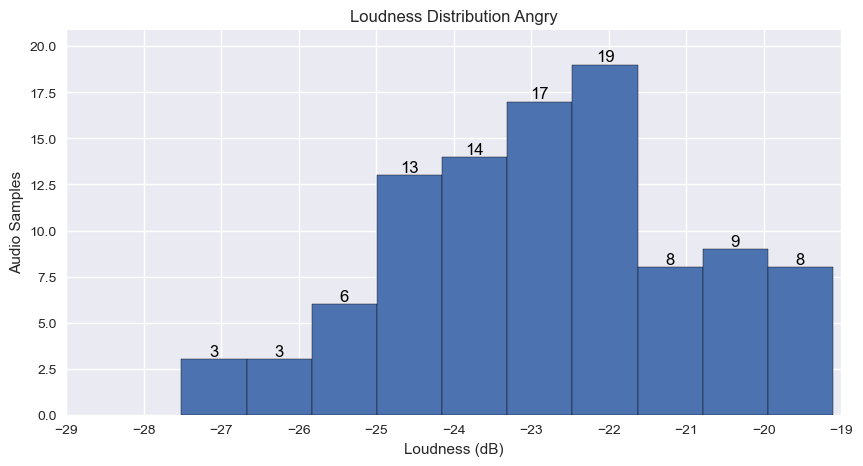

In [634]:
plot_loudness(angry_df, 'Angry')

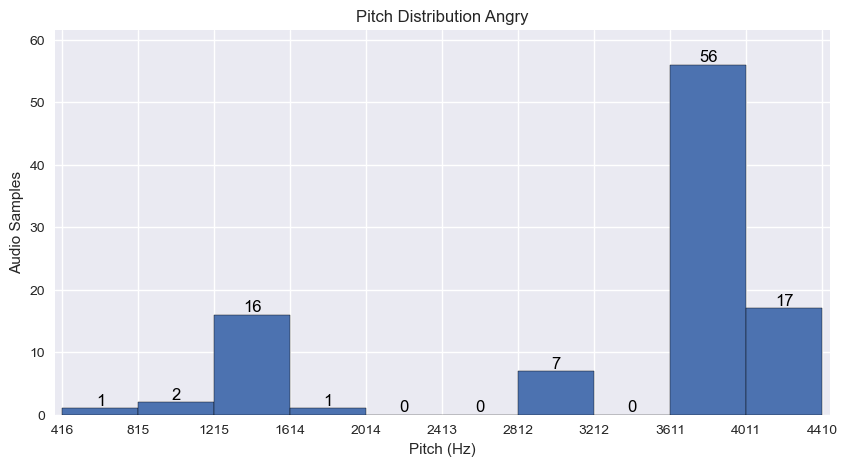

In [635]:
plot_pitch(angry_df, 'Angry')

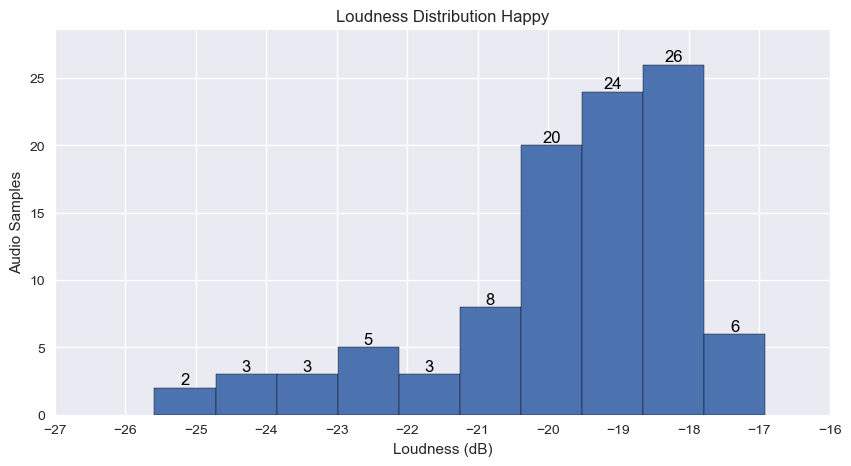

In [636]:
plot_loudness(happy_df, 'Happy')

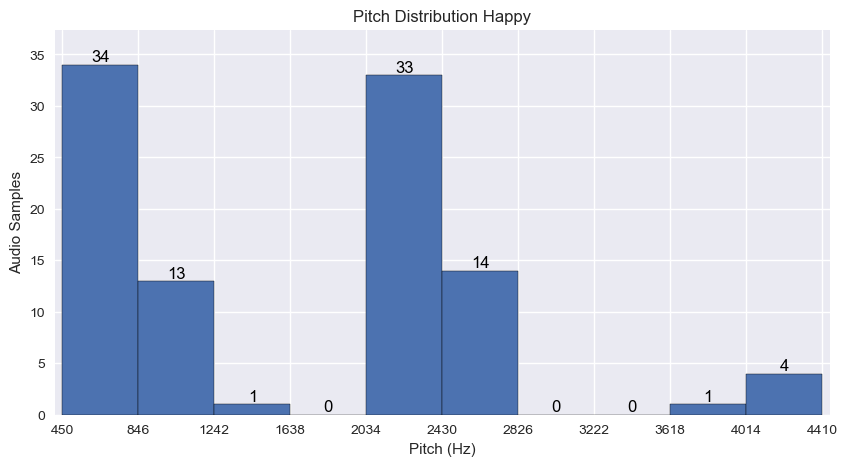

In [637]:
plot_pitch(happy_df, 'Happy')

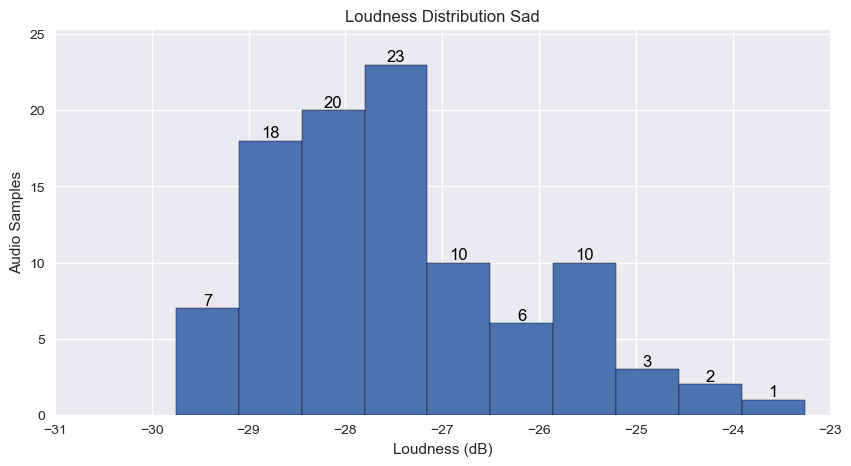

In [638]:
plot_loudness(sad_df, 'Sad')

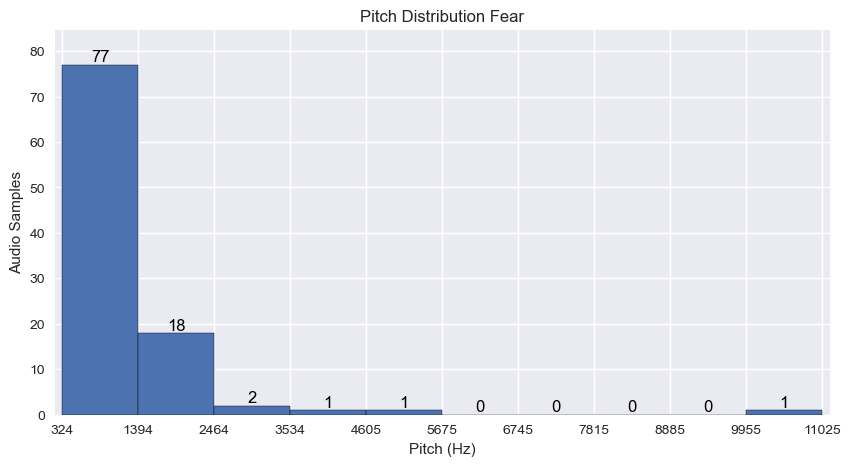

In [639]:
plot_pitch(fear_df, 'Fear')

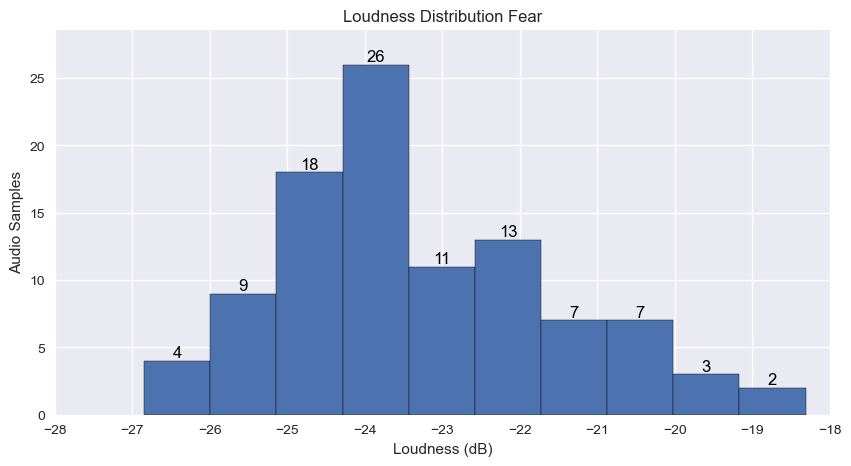

In [640]:
plot_loudness(fear_df, 'Fear')

In [641]:
def plotSadPitch(df, emotion):
    plt.figure(figsize=(10, 5))
    values, bins, bars = plt.hist(df['pitch'], edgecolor = 'black', bins = 10, rwidth = 1)
    plt.title('Pitch Distribution ' + emotion)
    plt.xlabel('Pitch (Hz)')
    plt.ylabel('Audio Samples')
    plt.bar_label(bars, fontsize = 12, color = 'black')
    plt.margins(x = 0.01, y = 0.1)
    min = df['pitch'].min()
    max = df['pitch'].max()
    plt.xticks(range(math.floor(min) - 1, math.ceil(max) + 1, 800))
    plt.show()

In [642]:
from scipy.fftpack import fft
from scipy.io import wavfile 
from scipy.fftpack import fft
from scipy.io import wavfile

def plotTimeDomain(emotion, signal, sample_rate):
    # samplefile = df.at[0, 'file']
    plt.figure(1)
    # signal, sample_rate = librosa.load(samplefile)
    librosa.display.waveshow(y = signal, sr = sample_rate)
    plt.xlabel('Time / Second')
    plt.ylabel('Amplitude')
    plt.title('Plot of Time Domain for Sample ' + emotion +  ' File')
    plt.show

def plotFrequencyDomain(emotion, signal, sample_rate):
    k = np.arange(len(signal))
    T = len(signal) / sample_rate
    freq = k / T
    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel('Frequency / Hz')
    plt.ylabel('Amplitude / dB')
    plt.title('Plot of Frequency Domain for Sample ' + emotion + ' File')
    plt.xlim([0, 100])
    plt.show()

def toPlot(df, emotion):
    samplefile = df.at[0, 'file']
    signal, sample_rate = librosa.load(samplefile)
    plotTimeDomain(emotion, signal, sample_rate)
    plotFrequencyDomain(emotion, signal, sample_rate)



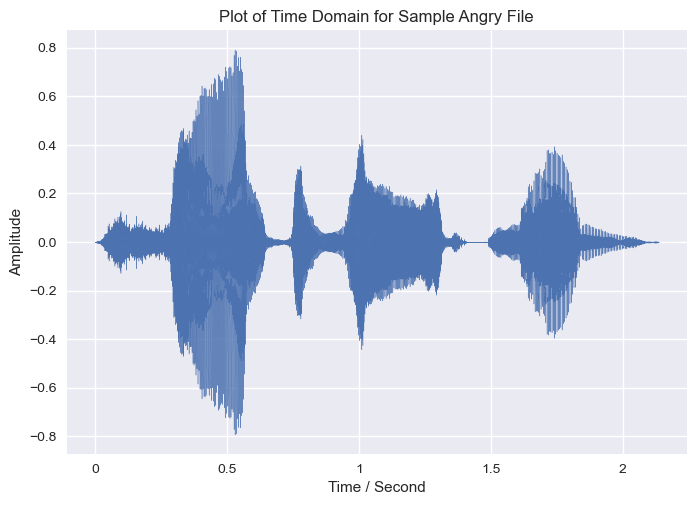

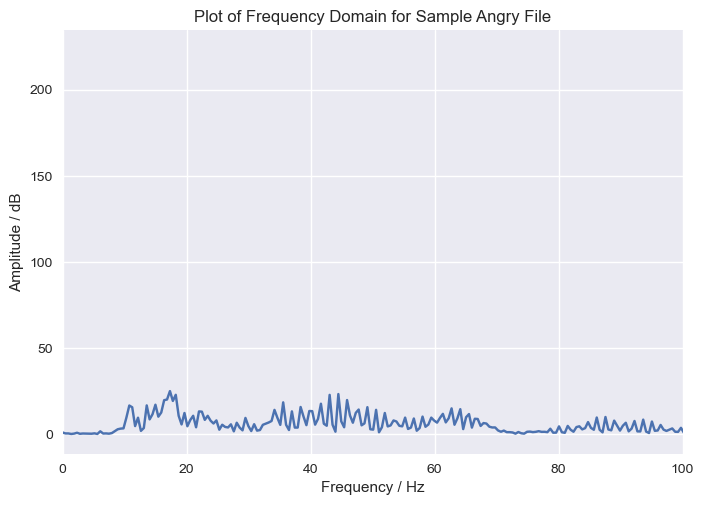

In [643]:
toPlot(angry_df, 'Angry')

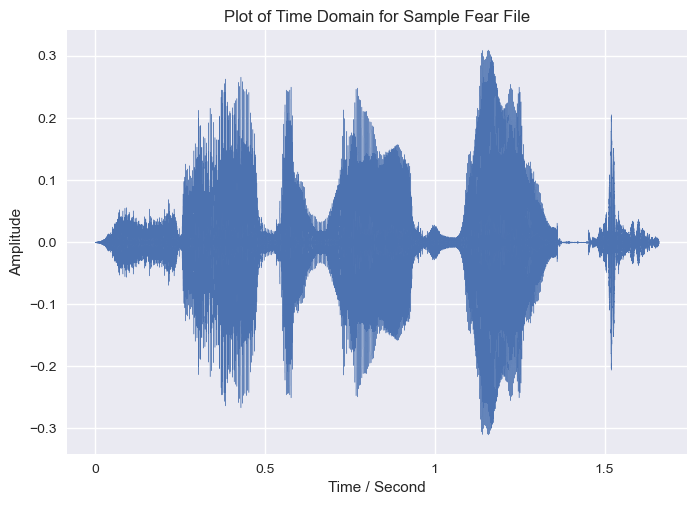

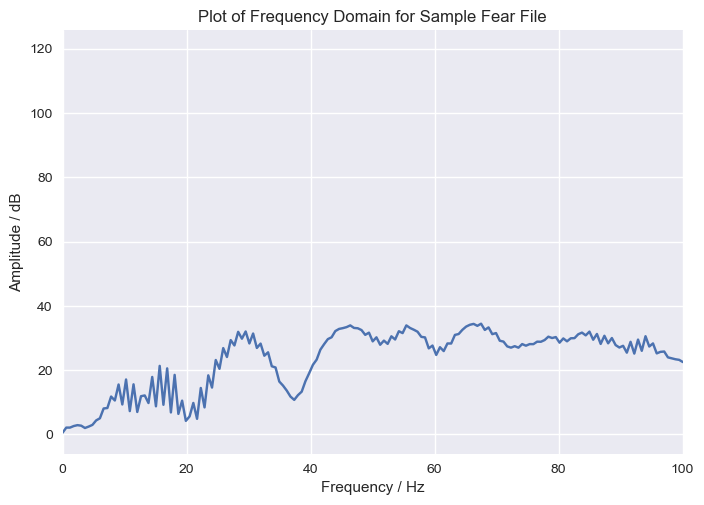

In [644]:
toPlot(fear_df, 'Fear')

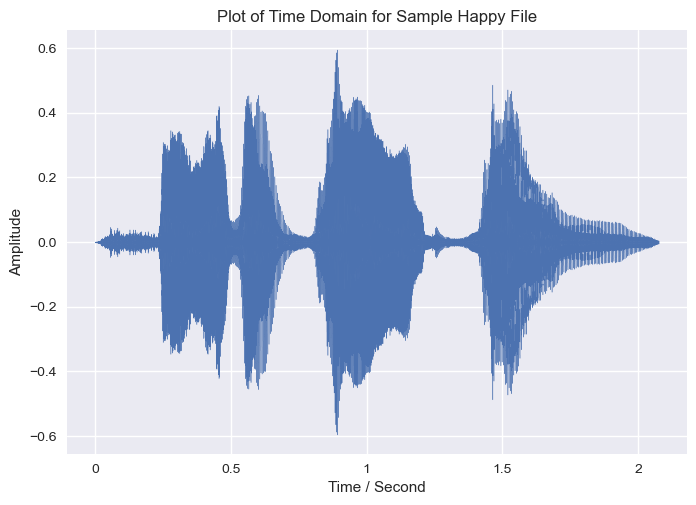

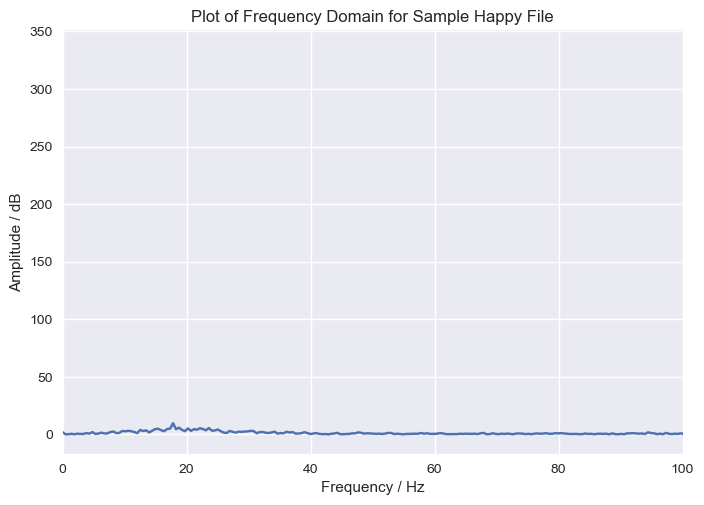

In [645]:
toPlot(happy_df, 'Happy')

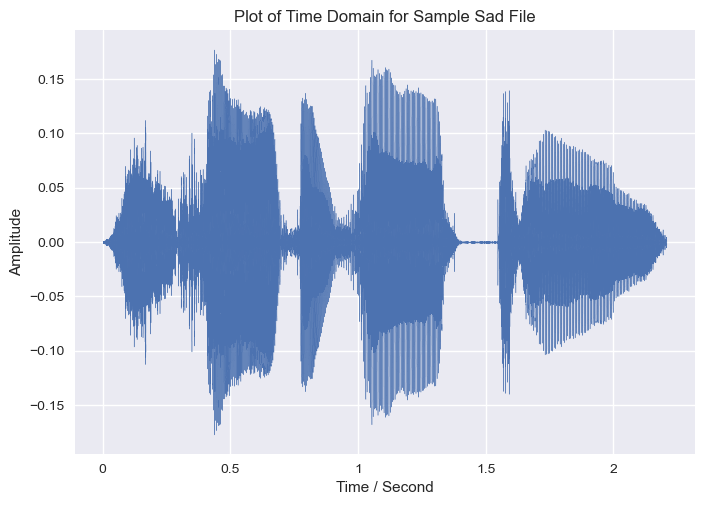

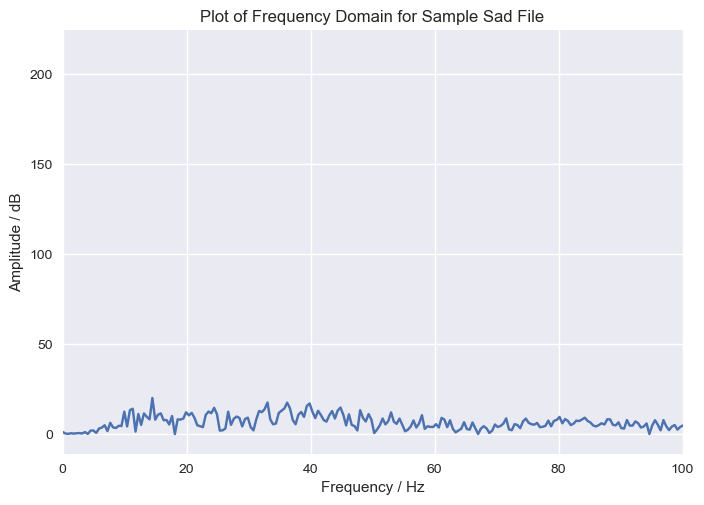

In [646]:
toPlot(sad_df, 'Sad')

In [647]:
file = angry_df.at[0, 'file']
signal, sample_rate = librosa.load(file)

df_mfccs = pd.DataFrame()
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -467.627014 -361.892609 -325.929169 -322.340546 -334.610138 -337.623596   
1  -32.551384  -68.631660  -96.364212 -107.317322 -106.760429  -93.175949   
2   -4.295674    8.647104   28.294514   42.807991   43.838902   28.633276   
3   30.202164   17.727463   -1.243267  -24.218803  -42.693512  -56.853962   
4  -14.418655  -19.898123  -17.674070   -5.455995   10.336810   12.646738   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -336.390381 -343.838654 -352.686951 -360.525452 -361.222443 -286.461426  
1  -91.918495 -101.092026 -104.360039  -99.173584  -87.431335  -26.485840  
2   16.028625   16.490059   12.741104    8.184677   19.440519   53.088127  
3  -57.266556  -47.877789  -45.534660  -48.504368  -46.071774  -13.125196  
4    7.721721   19.985884   23.621799   16.377449   19.938004   30.656677  


In [648]:
file = angry_df.at[1, 'file']
signal, sample_rate = librosa.load(file)

df_mfccs = pd.DataFrame()
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))


       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -484.472595 -427.659668 -402.075684 -379.667908 -366.238220 -360.057190   
1  -58.837208  -93.670502 -106.666824 -108.648254 -109.345528 -105.501282   
2   43.290264   61.420403   67.212296   57.990997   49.061066   40.707840   
3   21.386967    0.426026  -17.688129  -28.165703  -29.918455  -35.460609   
4    3.307875   10.277828   15.454926   19.018448   25.092819   20.283119   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -353.056854 -341.398987 -339.764282 -340.020935 -349.722351 -362.804382  
1 -106.289925 -101.580490  -96.128571  -93.250793  -98.908058  -98.839302  
2   33.495155   35.490891   36.980343   38.805759   35.781960   36.225182  
3  -32.928017  -33.988441  -37.300774  -33.429886  -33.613239  -36.327282  
4   14.388822   13.269012    9.940462   14.041130   16.665119   13.541716  


In [649]:
from librosa.util import normalize as norm

def normalizeValues(df):
    df['normalized mfccs'] = df['mfccs'].apply(lambda x: norm(x, axis = 1))
    df['normalized zcr'] = df['zcr'].apply(lambda x: norm(x, axis = 0))
    df['normalized chroma'] = df['chroma'].apply(lambda x: norm(x, axis = 1))
    df['normalized mel spectogram'] = df['mel spectogram'].apply(lambda x: norm(x, axis = 1))

In [650]:
normalizeValues(angry_df)
normalizeValues(happy_df)
normalizeValues(sad_df)
normalizeValues(fear_df)

In [651]:
def concatenateFeatures(df):
    df['concatenated mfccs'] = df['normalized mfccs'].apply(lambda x: [y for y in x.T])
    df['concatenated zcr'] = df['normalized zcr'].apply(lambda x: [y for y in x.T])
    df['concatenated chroma'] = df['normalized chroma'].apply(lambda x: [y for y in x.T])
    df['concatenated mel spectogram'] = df['normalized mel spectogram'].apply(lambda x: [y for y in x.T])

In [652]:
concatenateFeatures(angry_df)
concatenateFeatures(happy_df)
concatenateFeatures(sad_df)
concatenateFeatures(fear_df)

In [653]:
def averageFeatures(df):
    df['averaged mfccs'] = df['concatenated mfccs'].apply(lambda x: np.mean(x, axis = 0))
    df['averaged mfccs'] = df['averaged mfccs'].apply(lambda x: x.tolist())
    df['averaged zcr'] = df['concatenated zcr']
    # df['averaged zcr'] = df['averaged zcr'].apply(lambda x: np.array([float(x)]))
    df['averaged chroma'] = df['concatenated chroma'].apply(lambda x: np.mean(x, axis = 0))
    df['averaged chroma'] = df['averaged chroma'].apply(lambda x: x.tolist())
    df['averaged mel spectogram'] = df['concatenated mel spectogram'].apply(lambda x: np.mean(x, axis = 0))
    df['averaged mel spectogram'] = df['averaged mel spectogram'].apply(lambda x: x.tolist())

In [654]:
averageFeatures(angry_df)
averageFeatures(happy_df)
averageFeatures(sad_df)
averageFeatures(fear_df)

In [655]:
angry_df.head()

,file,data,emotion,loudness,pitch,mfccs,zcr,chroma,mel spectogram,normalized mfccs,...,normalized chroma,normalized mel spectogram,concatenated mfccs,concatenated zcr,concatenated chroma,concatenated mel spectogram,averaged mfccs,averaged zcr,averaged chroma,averaged mel spectogram
0,angry/YAF_numb_angry.wav,b'\x05\x00\x15\x00\x12\x00\xef\xff\xef\xff\x00...,1,-19.107531,3675.000,"[[-467.627, -361.8926, -325.92917, -322.34055,...","[0.228515625, 0.392578125, 0.58203125, 0.68701...","[[0.7681701, 0.50318307, 0.548958, 0.7878838, ...","[[4.572029e-05, 0.00015740524, 0.00020482684, ...","[[-0.7739542, -0.59895664, -0.53943473, -0.533...",...,"[[0.7681701, 0.50318307, 0.548958, 0.7878838, ...","[[5.941106e-06, 2.0453965e-05, 2.6616144e-05, ...","[[-0.7739542, -0.24845262, -0.051671404, 0.291...","[0.27973699940227137, 0.4805738194859534, 0.71...","[[0.7681701, 1.0, 0.4915089, 0.25918052, 0.399...","[[5.941106e-06, 3.2709663e-06, 3.8587623e-06, ...","[-0.506542980670929, 0.3111172020435333, -0.13...","[0.27973699940227137, 0.4805738194859534, 0.71...","[0.30020731687545776, 0.2889656126499176, 0.30...","[0.16973742842674255, 0.1151491031050682, 0.15..."
1,angry/YAF_seize_angry.wav,b'\x04\x00\xf1\xff\xed\xff\xcc\xff\xd8\xff\xdd...,1,-25.088015,3675.000,"[[-484.4726, -427.65967, -402.07568, -379.6679...","[0.30322265625, 0.5, 0.705078125, 0.7846679687...","[[1.0, 1.0, 0.679282, 0.4961893, 0.41316584, 0...","[[8.398777e-05, 0.00010183284, 0.00011473889, ...","[[-0.7561037, -0.6674372, -0.627509, -0.592537...",...,"[[1.0, 1.0, 0.679282, 0.4961893, 0.41316584, 0...","[[2.3036038e-05, 2.7930559e-05, 3.147041e-05, ...","[[-0.7561037, -0.43558377, 0.42402843, 0.18181...","[0.3652941176470588, 0.6023529411764705, 0.849...","[[1.0, 0.71116143, 0.55538756, 0.3946273, 0.19...","[[2.3036038e-05, 1.186955e-06, 8.412559e-07, 4...","[-0.581965446472168, 0.030166560783982277, 0.1...","[0.3652941176470588, 0.6023529411764705, 0.849...","[0.3669288158416748, 0.4079757630825043, 0.315...","[0.23731619119644165, 0.11601569503545761, 0.0..."
2,angry/YAF_pick_angry.wav,b'\x00\x00\xe9\xff\xdc\xff\xe3\xff\xf8\xff\x0e...,1,-21.642290,3675.000,"[[-475.14606, -383.43573, -359.5038, -368.6074...","[0.2548828125, 0.423828125, 0.6123046875, 0.69...","[[0.952394, 1.0, 1.0, 1.0, 0.5505931, 0.694218...","[[5.6769044e-05, 9.673667e-05, 8.190798e-05, 6...","[[-0.73209643, -0.5907908, -0.553917, -0.56794...",...,"[[0.952394, 1.0, 1.0, 1.0, 0.5505931, 0.694218...","[[1.3364792e-05, 2.277413e-05, 1.92831e-05, 1....","[[-0.73209643, -0.18679029, 0.12784809, 0.1472...","[0.330379746835443, 0.549367088607595, 0.79367...","[[0.952394, 1.0, 0.63502747, 0.49740496, 0.758...","[[1.3364792e-05, 6.6238586e-06, 1.2002137e-05,...","[-0.5224369764328003, 0.16128583252429962, -0....","[0.330379746835443, 0.549367088607595, 0.79367...","[0.4922005236148834, 0.5700622200965881, 0.521...","[0.14769266545772552, 0.1296287328004837, 0.16..."
3,angry/YAF_mouse_angry.wav,b'\x05\x00\xff\xff\xf7\xff\xea\xff\xe6\xff\xde...,1,-22.570003,3675.000,"[[-478.60437, -420.2219, -408.68198, -375.8366...","[0.2998046875, 0.4921875, 0.68896484375, 0.764...","[[0.8388581, 0.5132289, 0.41406277, 0.39220354...","[[8.03134e-05, 0.00010821783, 7.408272e-05, 0....","[[-0.8482641, -0.7447887, -0.72433573, -0.6661...",...,"[[0.8388581, 0.5132289, 0.41406277, 0.39220354...","[[1.6886208e-05, 2.2753222e-05, 1.5576183e-05,...","[[-0.8482641, -0.38339734, 0.33168378, 0.14214...","[0.3692122669873722, 0.6061334936861095, 0.848...","[[0.8388581, 1.0, 0.7382542, 0.44836578, 0.476...","[[1.6886208e-05, 2.9793775e-06, 3.5250466e-06,...","[-0.5950879454612732, 0.07887578010559082, -0....","[0.3692122669873722, 0.6061334936861095, 0.848...","[0.3648442327976227, 0.4096612334251404, 0.373...","[0.16472874581813812, 0.11452062427997589, 0.1..."
4,angry/YAF_whip_angry.wav,b'\x00\x00\xfc\xff\x00\x00\xff\xff\xf8\xff\xe7...,1,-21.914763,1378.125,"[[-537.156, -417.95966, -358.1933, -351.0585, ...","[0.18115234375, 0.328125, 0.503

In [656]:
df_list = [angry_df, happy_df, sad_df, fear_df]
tot_df = pd.concat(df_list)
tot_df = tot_df.sample(frac = 1)
tot_df

,file,data,emotion,loudness,pitch,mfccs,zcr,chroma,mel spectogram,normalized mfccs,...,normalized chroma,normalized mel spectogram,concatenated mfccs,concatenated zcr,concatenated chroma,concatenated mel spectogram,averaged mfccs,averaged zcr,averaged chroma,averaged mel spectogram
20,happy/YAF_raid_happy.wav,b'\x1f\x00\x01\x00\xee\xff\x11\x00*\x00\x15\x0...,2,-19.538019,551.250000,"[[-465.03534, -393.7782, -361.54272, -362.9488...","[0.3193359375, 0.517578125, 0.716796875, 0.786...","[[0.4703663, 0.42212567, 0.3550005, 0.31835768...","[[8.406644e-05, 0.00028236595, 0.0003051243, 0...","[[-0.9031226, -0.7647376, -0.7021346, -0.70486...",...,"[[0.4703663, 0.42212567, 0.3550005, 0.31835768...","[[7.333123e-06, 2.4630805e-05, 2.6616019e-05, ...","[[-0.9031226, -0.24507026, 0.41996092, 0.12105...","[0.38882282996432815, 0.6302021403091558, 0.87...","[[0.4703663, 0.8140839, 1.0, 0.4088442, 0.3336...","[[7.333123e-06, 3.6089411e-06, 1.4016633e-06, ...","[-0.5818246603012085, 0.2707023024559021, -0.1...","[0.38882282996432815, 0.6302021403091558, 0.87...","[0.2793240249156952, 0.20253489911556244, 0.28...","[0.2705099284648895, 0.1716633141040802, 0.082..."
84,fear/YAF_shack_fear.wav,b'\xf3\xff\xe7\xff\xeb\xff\xec\xff\xe0\xff\xe4...,4,-21.532462,1837.500000,"[[-583.6165, -415.63947, -335.6434, -328.67297...","[0.08740234375, 0.26171875, 0.45849609375, 0.6...","[[1.0, 0.92404354, 0.6285777, 0.47694576, 0.24...","[[0.00014472299, 0.0024865149, 0.026375825, 0....","[[-0.9922881, -0.7066868, -0.5706743, -0.55882...",...,"[[1.0, 0.92404354, 0.6285777, 0.47694576, 0.24...","[[2.6530008e-05, 0.0004558174, 0.004835105, 0....","[[-0.9922881, 0.16512717, 0.21108727, 0.310094...","[0.10718562874251497, 0.3209580838323353, 0.56...","[[1.0, 0.8865185, 0.71004725, 0.71192414, 0.79...","[[2.6530008e-05, 1.3571056e-06, 2.6856995e-07,...","[-0.48720183968544006, 0.16014395654201508, -0...","[0.10718562874251497, 0.3209580838323353, 0.56...","[0.4922720491886139, 0.5376496911048889, 0.404...","[0.19821640849113464, 0.1299353688955307, 0.06..."
56,fear/YAF_neat_fear.wav,,4,-23.668002,918.750000,"[[-473.0294, -381.44388, -352.04407, -363.2652...","[0.234375, 0.40966796875, 0.60009765625, 0.697...","[[0.816413, 0.9076394, 1.0, 0.9097602, 0.68770...","[[0.0007208296, 0.009772293, 0.01022175, 0.001...","[[-0.84167725, -0.678716, -0.6264039, -0.64637...",...,"[[0.816413, 0.9076394, 1.0, 0.9097602, 0.68770...","[[0.00012503931, 0.0016951591, 0.0017731244, 0...","[[-0.84167725, -0.14091659, 0.5469294, 0.26900...","[0.3007518796992481, 0.5256892230576441, 0.770...","[[0.816413, 0.6156821, 0.31552318, 0.33634335,...","[[0.00012503931, 3.0063218e-06, 2.1432488e-06,...","[-0.58109450340271, 0.20790298283100128, -0.04...","[0.3007518796992481, 0.5256892230576441, 0.770...","[0.379036009311676, 0.32595962285995483, 0.291...","[0.36064285039901733, 0.19078217446804047, 0.0..."
90,sad/YAF_met_sad.wav,b'\xff\xff\r\x00\x08\x00\xf7\xff\n\x00\x1c\x00...,3,-26.547876,408.333333,"[[-527.19025, -465.27286, -444.3993, -429.9945...","[0.251953125, 0.43896484375, 0.63134765625, 0....","[[0.6020792, 0.79715484, 0.63533014, 0.4567763...","[[9.687964e-05, 0.00053574954, 0.00065276906, ...","[[-0.87811345, -0.7749809, -0.74021286, -0.716...",...,"[[0.6020792, 0.79715484, 0.63533014, 0.4567763...","[[1.0070072e-05, 5.568803e-05, 6.785152e-05, 3...","[[-0.87811345, -0.117462054, 0.3622933, 0.3084...","[0.33055733504164, 0.5759128763613068, 0.82831...","[[0.6020792, 0.51573944, 0.41547245, 0.4363573...","[[1.0070072e-05, 3.928556e-06, 3.2641708e-06, ...","[-0.6483708620071411, 0.3433350920677185, 0.27...","[0.33055733504164, 0.5759128763613068, 0.82831...","[0.247968390583992, 0.36487290263175964, 0.417...","[0.3597332239151001, 0.22972102463245392, 0.15..."
55,angry/YAF_wash_angry.wav,b'\x05\x00\xf8\xff\xf0\xff\xe9\xff\xe1\xff\xf8...,1,-24.492426,4410.000000,"[[-467.5649, -379.6958, -361.6724, -379.5192, ...","[0.22802734375, 0.40478515625, 0.59423828125, ...","[[1.0, 0.70038635, 0.

In [657]:
type(angry_df.at[0, 'averaged mfccs'])

list

In [658]:
def getFeatures(feature):
    features_list = feature
    return tot_df[features_list].copy()

def getResults():
    result = ['emotion']
    return tot_df[result].copy()

In [659]:
def trainTestSplit(features, result):
    X = features
    y = result
    return train_test_split(X, y, test_size=0.3)

In [660]:
def passFormat(test_set, feature):
    return np.array(test_set[feature].values.tolist())


In [661]:
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, StandardScaler
from scipy import sparse
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# padded_X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding = 'post')


In [662]:
X = getFeatures(['averaged mfccs'])
y = getResults()

X_train, X_test, y_train, y_test = trainTestSplit(X, y)

X_pass = passFormat(X_train, 'averaged mfccs')
y_pass = passFormat(y_train, 'emotion')
X_test = passFormat(X_test, 'averaged mfccs')
y_test = passFormat(y_test, 'emotion')

In [663]:
clf = LinearSVC()
predictions = clf.fit(X_pass, y_pass).predict(X_test)
print('Linear SVC for MFCCs accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC for MFCCs accuracy: 0.93

              precision    recall  f1-score   support

           1       0.85      0.97      0.91        30
           2       0.89      0.89      0.89        28
           3       1.00      1.00      1.00        27
           4       1.00      0.89      0.94        35

    accuracy                           0.93       120
   macro avg       0.94      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [664]:
clf = OneVsOneClassifier(SVC(kernel='linear',probability=True))
predictions = clf.fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs One Classifier for MFCCs accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC and One vs One Classifier for MFCCs accuracy: 0.94

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        30
           2       0.96      0.93      0.95        28
           3       1.00      1.00      1.00        27
           4       1.00      0.86      0.92        35

    accuracy                           0.94       120
   macro avg       0.95      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



In [665]:
# y_preb_probs = clf.predict_proba(X_test)
# roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovo")

In [666]:
onevsrestsvc_mfcc_preds = OneVsRestClassifier(LinearSVC()).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs Rest Classifier for MFCCs accuracy: %.2f\n' % (metrics.accuracy_score(y_test, onevsrestsvc_mfcc_preds)))
print(classification_report(y_test, predictions))

Linear SVC and One vs Rest Classifier for MFCCs accuracy: 0.93

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        30
           2       0.96      0.93      0.95        28
           3       1.00      1.00      1.00        27
           4       1.00      0.86      0.92        35

    accuracy                           0.94       120
   macro avg       0.95      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



In [667]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(X_pass, y_pass)
results = rf_model.predict(X_test)
print('Random Forest for MFCCs accuracy: %.2f\n' % (metrics.accuracy_score(y_test, results)))
print(classification_report(y_test, predictions))

Random Forest for MFCCs accuracy: 0.95

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        30
           2       0.96      0.93      0.95        28
           3       1.00      1.00      1.00        27
           4       1.00      0.86      0.92        35

    accuracy                           0.94       120
   macro avg       0.95      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



In [668]:
X = getFeatures(['averaged chroma'])
y = getResults()
X_train, X_test, y_train, y_test = trainTestSplit(X, y)

X_pass = passFormat(X_train, 'averaged chroma')
y_pass = passFormat(y_train, 'emotion')
X_test = passFormat(X_test, 'averaged chroma')
y_test = passFormat(y_test, 'emotion')

In [669]:
predictions = LinearSVC().fit(X_pass, y_pass).predict(X_test)
print('Linear SVC for Chroma accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC for Chroma accuracy: 0.87

              precision    recall  f1-score   support

           1       0.83      0.93      0.88        27
           2       0.75      0.79      0.77        19
           3       0.93      0.85      0.89        33
           4       0.90      0.88      0.89        41

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [670]:
predictions = OneVsOneClassifier(LinearSVC()).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs One Classifier for Chroma accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC and One vs One Classifier for Chroma accuracy: 0.87

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        27
           2       0.79      0.79      0.79        19
           3       0.93      0.85      0.89        33
           4       0.88      0.90      0.89        41

    accuracy                           0.87       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [671]:
predictions = OneVsRestClassifier(LinearSVC()).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs Rest Classifier for Chroma accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC and One vs Rest Classifier for Chroma accuracy: 0.87

              precision    recall  f1-score   support

           1       0.83      0.93      0.88        27
           2       0.75      0.79      0.77        19
           3       0.93      0.85      0.89        33
           4       0.90      0.88      0.89        41

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [672]:
predictions = rf_model.predict(X_test)
print('Random Forest for Chroma accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Random Forest for Chroma accuracy: 0.15

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        19
           3       0.17      0.55      0.26        33
           4       0.00      0.00      0.00        41

    accuracy                           0.15       120
   macro avg       0.04      0.14      0.07       120
weighted avg       0.05      0.15      0.07       120



/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [673]:
X = getFeatures(['averaged mel spectogram'])
y = getResults()
X_train, X_test, y_train, y_test = trainTestSplit(X, y)

X_pass = passFormat(X_train, 'averaged mel spectogram')
y_pass = passFormat(y_train, 'emotion')
X_test = passFormat(X_test, 'averaged mel spectogram')
y_test = passFormat(y_test, 'emotion')

In [674]:
predictions = LinearSVC().fit(X_pass, y_pass).predict(X_test)
print('Linear SVC for Mel Spectogram accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC for Mel Spectogram accuracy: 0.75

              precision    recall  f1-score   support

           1       0.65      0.80      0.72        30
           2       0.84      0.79      0.81        33
           3       0.79      0.87      0.83        31
           4       0.72      0.50      0.59        26

    accuracy                           0.75       120
   macro avg       0.75      0.74      0.74       120
weighted avg       0.75      0.75      0.75       120



In [675]:
predictions = OneVsOneClassifier(LinearSVC()).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs One Classifier for Mel Spectogram accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC and One vs One Classifier for Mel Spectogram accuracy: 0.71

              precision    recall  f1-score   support

           1       0.58      0.83      0.68        30
           2       0.88      0.67      0.76        33
           3       0.86      0.81      0.83        31
           4       0.57      0.50      0.53        26

    accuracy                           0.71       120
   macro avg       0.72      0.70      0.70       120
weighted avg       0.73      0.71      0.71       120



In [676]:
predictions = OneVsRestClassifier(LinearSVC()).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs Rest Classifier for Mel Spectogram accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC and One vs Rest Classifier for Mel Spectogram accuracy: 0.75

              precision    recall  f1-score   support

           1       0.65      0.80      0.72        30
           2       0.84      0.79      0.81        33
           3       0.79      0.87      0.83        31
           4       0.72      0.50      0.59        26

    accuracy                           0.75       120
   macro avg       0.75      0.74      0.74       120
weighted avg       0.75      0.75      0.75       120



In [677]:
predictions = rf_model.predict(X_test)
print('Random Forest for Mel Spectrogram accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Random Forest for Mel Spectrogram accuracy: 0.23

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        33
           3       0.50      0.03      0.06        31
           4       0.22      1.00      0.36        26

    accuracy                           0.23       120
   macro avg       0.18      0.26      0.11       120
weighted avg       0.18      0.23      0.09       120



/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [678]:
X = getFeatures(['pitch', 'loudness'])
y = getResults()

X_train, X_test, y_train, y_test = trainTestSplit(X, y)

X_pass = passFormat(X_train, ['pitch', 'loudness'])
y_pass = passFormat(y_train, 'emotion')
X_test = passFormat(X_test, ['pitch', 'loudness'])
y_test = passFormat(y_test, 'emotion')

In [679]:
predictions = LinearSVC(dual = True, max_iter = 15000).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC for Pitch and Loudness accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC for Pitch and Loudness accuracy: 0.36

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
           2       0.28      0.73      0.40        33
           3       0.58      0.73      0.64        26
           4       0.00      0.00      0.00        30

    accuracy                           0.36       120
   macro avg       0.21      0.36      0.26       120
weighted avg       0.20      0.36      0.25       120



/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score 

In [680]:
predictions = OneVsOneClassifier(LinearSVC()).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs One Classifier for Pitch and Loudness accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC and One vs One Classifier for Pitch and Loudness accuracy: 0.42

              precision    recall  f1-score   support

           1       0.51      0.77      0.62        31
           2       0.00      0.00      0.00        33
           3       0.29      0.73      0.42        26
           4       1.00      0.27      0.42        30

    accuracy                           0.42       120
   macro avg       0.45      0.44      0.36       120
weighted avg       0.45      0.42      0.35       120



/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-pack

In [681]:
predictions = OneVsRestClassifier(LinearSVC()).fit(X_pass, y_pass).predict(X_test)
print('Linear SVC and One vs Rest Classifier for Pitch and Loudness accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Linear SVC and One vs Rest Classifier for Pitch and Loudness accuracy: 0.36

              precision    recall  f1-score   support

           1       0.45      0.77      0.57        31
           2       0.00      0.00      0.00        33
           3       0.28      0.73      0.41        26
           4       0.00      0.00      0.00        30

    accuracy                           0.36       120
   macro avg       0.18      0.38      0.25       120
weighted avg       0.18      0.36      0.24       120



/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anishapaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [682]:
rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(X_pass, y_pass)
predictions = rf_model.predict(X_test)
print('Random Forest for Pitch and Loudness accuracy: %.2f\n' % (metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Random Forest for Pitch and Loudness accuracy: 0.82

              precision    recall  f1-score   support

           1       0.89      0.81      0.85        31
           2       0.93      0.76      0.83        33
           3       0.86      0.92      0.89        26
           4       0.65      0.80      0.72        30

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120

